<a href="https://colab.research.google.com/github/rajan5639/Machine_learning/blob/main/ML_ensemble_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1. Can we use Bagging for regression problems?
Yes, Bagging can be used for regression problems. The Bagging Regressor is an ensemble learning method that applies bootstrap aggregation to regression models.
 It works by training multiple instances of a base regression model on different subsets of the training data (sampled with replacement) and then averaging their predictions.
  This reduces variance and helps in avoiding overfitting.

A popular example of bagging in regression is the Random Forest Regressor, which consists of multiple decision trees whose outputs are averaged to make a final prediction.

Bagging works well for high-variance models like decision trees and helps improve their stability and accuracy by reducing the impact of noise in the dataset.

'''

In [ ]:
'''

2. What is the difference between multiple model training and single model training?
Single model training involves training a single predictive model on the given dataset, whereas multiple model training (ensemble learning) involves training multiple models and combining their predictions to improve accuracy and robustness.

Single Model Training:
Uses only one algorithm.
More prone to overfitting or underfitting.
Performance depends entirely on a single model’s capability.
Multiple Model Training (Ensemble Methods):
Uses multiple models to improve performance.
Reduces bias and variance.
More robust and generalizes well to unseen data.
Examples include Bagging, Boosting, and Stacking.
By combining multiple models, ensemble methods can outperform individual models, especially in complex datasets where a single model may struggle to generalize well.

'''

In [ ]:
'''


3. Explain the concept of feature randomness in Random Forest.
Feature randomness in Random Forest refers to how the model selects a random subset of features at each split while constructing individual decision trees. This randomness ensures diversity among the trees, making the ensemble more robust.

How Feature Randomness Works:
In standard decision trees, the best feature is chosen at every split based on a criterion like Gini impurity or information gain.
In Random Forest, instead of considering all features, a random subset of features is selected at each node, and the best feature from this subset is chosen for splitting.
This randomness decorrelates the trees, reducing overfitting and improving generalization.
Benefits of Feature Randomness:
Prevents certain dominant features from overpowering the model.
Ensures that different trees learn different aspects of the data.
Helps improve prediction accuracy, especially on unseen data.
By introducing both bootstrapped data samples and feature randomness, Random Forest becomes a powerful and stable ensemble method.

'''

In [ ]:
'''
. What is OOB (Out-of-Bag) Score?
The Out-of-Bag (OOB) Score is an internal performance evaluation metric used in Random Forest to estimate its accuracy without needing a separate validation set. It is based on the idea of bootstrap sampling, where each decision tree in the forest is trained on a randomly selected subset of the training data.

How OOB Score Works:
Each tree in the Random Forest is trained on a bootstrap sample (randomly drawn with replacement).
About 37% of the training data is left out of each tree’s training process. These left-out samples are called out-of-bag samples.
After training, each tree makes predictions on its corresponding OOB samples.
The final OOB score is calculated as the average prediction accuracy across all these OOB samples.
Advantages of OOB Score:
Eliminates the need for a separate validation set, making it useful when data is limited.
Provides an unbiased estimate of the model’s performance.
Helps in detecting overfitting, as OOB error tends to be higher if the model is too complex.
OOB score is an efficient way to assess the generalization ability of a Random Forest model without using cross-validation.


'''

In [ ]:
'''
5. How can you measure the importance of features in a Random Forest model?
Feature importance in a Random Forest model helps determine which features have the most influence on predictions. Random Forest provides two main techniques to measure feature importance:

1. Mean Decrease in Impurity (MDI) – Gini Importance
Each decision tree in the Random Forest splits nodes based on a feature that provides the highest information gain or Gini impurity reduction.
The importance of a feature is calculated as the average impurity reduction across all trees where the feature was used for splitting.
The more a feature reduces impurity, the higher its importance.
2. Mean Decrease in Accuracy (MDA) – Permutation Importance
This method measures how much the model’s accuracy drops when a particular feature’s values are randomly shuffled (disrupted).
If shuffling a feature significantly reduces model accuracy, it means the feature was important for predictions.
If shuffling has little to no effect, the feature is considered less important
'''

In [ ]:
'''
6. Explain the working principle of a Bagging Classifier.
A Bagging Classifier (Bootstrap Aggregating Classifier) is an ensemble learning method that improves model stability and accuracy by training multiple models on different random subsets of the training data and then combining their predictions.

How Bagging Classifier Works:
Bootstrap Sampling:

Multiple training sets are created by randomly selecting samples with replacement from the original dataset.
Each new dataset is called a bootstrap sample and has the same size as the original dataset.
Model Training:

A separate model (usually a Decision Tree) is trained on each bootstrap sample.
Since each model sees a slightly different dataset, they learn different patterns.
Prediction Aggregation:

For classification tasks, predictions from all models are combined using majority voting (the most common predicted class is chosen).
For regression tasks, predictions are averaged to get the final output.

'''

In [ ]:
# 7. How do you evaluate a Bagging Classifier's performance?
# Evaluating the performance of a Bagging Classifier is essential to ensure that it improves accuracy, reduces variance, and generalizes well to new data. Several methods can be used to assess its effectiveness:

# 1. Accuracy Score (for Classification) and R² Score (for Regression)
# Accuracy is a simple metric for classification tasks, measuring how many predictions are correct.
# The R² score (coefficient of determination) is used for regression models to measure how well predictions match actual values.
# Example in Python:


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Classifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Predictions
y_pred = bagging.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)
# 2. Confusion Matrix and Classification Report (for Classification Tasks)
# The confusion matrix helps analyze how many predictions were correct or incorrect for each class.
# The classification report includes precision, recall, and F1-score for a deeper understanding of performance.
# Example in Python:


from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix and report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 3. Cross-Validation for Stability
# K-Fold Cross-Validation splits the data into k subsets and evaluates the model multiple times to check consistency.
# This helps measure if the model performs well on different data splits.
# Example in Python:


from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
# 4. Out-of-Bag (OOB) Score (Specific to Bagging)
# Since bagging uses bootstrap sampling, around 37% of training data is left out from each model (Out-of-Bag data).
# OOB score is an internal validation metric to estimate performance without a separate validation set.
# Enable OOB Score in BaggingClassifier:


bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, oob_score=True, random_state=42)
bagging.fit(X_train, y_train)
print("OOB Score:", bagging.oob_score_)


In [ ]:
'''
8. How does a Bagging Regressor work?
A Bagging Regressor is an ensemble learning technique that improves the performance of regression models by reducing variance and increasing stability. It works by training multiple instances of the same regression model on different bootstrap samples of the dataset and then aggregating their predictions.

Working Principle of Bagging Regressor
Bootstrap Sampling:

Multiple subsets of the training data are created using bootstrap sampling (sampling with replacement).
Each subset is of the same size as the original dataset, but some data points may appear multiple times while others may be missing.
Model Training:

A base regression model (like Decision Tree Regressor, Linear Regression, or SVR) is trained on each bootstrap sample.
Each model learns slightly different patterns due to the varying training data.
Prediction Aggregation:

Once trained, all the models predict values for the test data.
The final prediction is obtained by averaging the predictions from all models.




When to Use Bagging Regressor?
When you have a high-variance model like Decision Trees, bagging helps smooth predictions.
When the dataset is noisy or has outliers, bagging reduces their impact.
When you need a more stable and generalized regression model.
Key Takeaways
Bagging Regressor is an ensemble technique that aggregates multiple regressors to improve performance.
It uses bootstrap sampling and averaging to make predictions more reliable.
Works well with Decision Trees, Linear Regression, and other regressors to reduce variance.
Performance is measured using MSE (Mean Squared Error), RMSE, or R² Score.
Bagging Regressor is a powerful technique when dealing with complex regression problems where reducing variance is essential.

'''

In [ ]:
'''
9. What are the advantages and disadvantages of Bagging?
Bagging (Bootstrap Aggregating) is a powerful ensemble learning technique used to improve the performance of machine learning models by reducing variance and increasing stability. However, it has both advantages and disadvantages that should be considered before implementation.

Advantages of Bagging
1. Reduces Overfitting (Variance Reduction)
Since bagging trains multiple models on different bootstrap samples and aggregates their predictions, it reduces variance and prevents overfitting.
Works well for high-variance models like Decision Trees.
2. Improves Model Stability & Accuracy
Bagging makes models more stable by averaging predictions from multiple models, which improves generalization to new data.
It often increases accuracy compared to a single model.
3. Handles Noisy Data Better
Since each model is trained on different random subsets, individual outliers or noise have less impact on the final prediction.
This makes bagging robust to noisy datasets.
4. Works Well with Complex Models
Bagging is particularly effective with non-linear models like Decision Trees, Neural Networks, and k-NN, which tend to have high variance.
5. Can Use Out-of-Bag (OOB) Score for Validation
Bagging allows an internal validation metric (OOB Score) using the unused training data, reducing the need for a separate validation set.
Disadvantages of Bagging
1. Increased Computational Cost
Bagging requires training multiple models instead of just one, making it computationally expensive.
It may not be suitable for real-time applications where speed is critical.
2. Does Not Reduce Bias
Bagging mainly reduces variance but does not lower bias.
If the base model is too simple (e.g., linear regression on non-linear data), bagging will not improve its accuracy significantly.
3. Requires More Storage and Memory
Since bagging trains multiple models, it requires more memory and storage than a single model.
This can be a challenge when dealing with large datasets.
4. Not Always Useful for Low-Variance Models
Models like Linear Regression or Naïve Bayes already have low variance; applying bagging may not significantly improve performance.
When to Use Bagging?
When using high-variance models like Decision Trees to reduce overfitting.
When dealing with noisy datasets where stable predictions are needed.
When a slightly higher computational cost is acceptable for improved accuracy.
When an internal validation metric (OOB Score) is needed without separate test data.

'''

In [ ]:
'''
10. Compare Bagging and Boosting.
Bagging and Boosting are both ensemble learning techniques that improve the performance of machine learning models by combining multiple weak learners. However, they work differently in terms of training models, handling errors, and reducing bias or variance. Below is a detailed comparison of both methods.

1. Definition
Bagging (Bootstrap Aggregating):

Bagging involves training multiple models independently in parallel using different random subsets of the data (bootstrap sampling).
The final prediction is made by averaging the outputs (for regression) or majority voting (for classification).
Example: Random Forest is a popular bagging algorithm.
Boosting:

Boosting trains models sequentially, where each new model focuses on correcting the errors made by the previous models.
The models are weighted based on their accuracy, and their predictions are combined to improve the final result.
Example: AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost.
2. Working Mechanism
Bagging (Parallel Learning)
Each model is trained independently on randomly sampled data.
Predictions from all models are combined by majority voting (classification) or averaging (regression).
Reduces variance and prevents overfitting.
Boosting (Sequential Learning)
Models are trained one after another, and each model corrects the mistakes made by the previous one.
Assigns higher weight to misclassified instances to focus on harder examples.
Reduces bias and improves accuracy, but can overfit if not tuned properly.

'''

In [ ]:
'''
11. Explain the concept of entropy in the context of Decision Trees.
1. Definition of Entropy
Entropy is a fundamental concept in information theory and is used in decision trees to measure the impurity or randomness of a dataset.

It helps in determining how well a given feature separates the data into different classes.

In simple terms, entropy quantifies the uncertainty in a dataset—a high entropy means the dataset is highly impure (contains mixed classes), whereas a low entropy means the dataset is pure (mostly belongs to one class).

2. Understanding Entropy with Examples
Case 1: Pure Dataset (Entropy = 0)

Suppose we have a dataset where all instances belong to the same class (e.g., all "Yes").
Since there is no uncertainty, entropy is 0 (lowest possible value).



3. Entropy in Decision Trees
Decision Trees use entropy to select the best feature for splitting the data at each node.

Entropy Before Split: Measures how impure the dataset is before splitting.
Entropy After Split: Measures the weighted sum of the entropy of child nodes after splitting.
Information Gain:
The reduction in entropy after splitting is called Information Gain.
The feature with the highest information gain is selected for splitting the node.

'''

In [ ]:
'''

13. Explain the concept of Information Gain in Decision Trees.
1. What is Information Gain?
Information Gain (IG) is a measure used in Decision Trees to determine the best feature to split a dataset.
 It quantifies how much uncertainty (entropy) is reduced after a split. The feature with the highest Information Gain is chosen for splitting because it creates the purest child nodes.

Entropy (Parent): Measures the impurity of the original dataset.

Entropy (Child): Measures impurity after splitting.

|Child| / |Parent|: Weight of each child node in the total dataset.

'''

In [ ]:
'''

14. Explain the concept of Pruning in Decision Trees.
1. What is Pruning in Decision Trees?
Pruning is a technique used to reduce the size of a Decision Tree by removing branches that provide little or no predictive power. It helps to prevent overfitting by simplifying the tree structure while maintaining accuracy.

Pruning can be applied during tree construction (pre-pruning) or after the tree has been fully grown (post-pruning).

2. Why is Pruning Necessary?
When a Decision Tree grows too deep, it captures noise in the training data, leading to overfitting. Overfitting results in a tree that:

Fits the training data perfectly but performs poorly on unseen data.
Has unnecessary branches that add complexity.
Pruning helps by:

Reducing model complexity.
Improving generalization to new data.
Avoiding data-specific splits that do not contribute to better predictions.
3. Types of Pruning
A. Pre-Pruning (Early Stopping)
Also known as "early stopping," pre-pruning stops the tree from growing before it becomes too complex.
It uses conditions like:
Maximum depth limit → Stop growing the tree beyond a certain depth.
Minimum samples per split → Require a minimum number of samples to split a node.
Minimum impurity decrease → Stop splitting if the reduction in impurity (Gini/Entropy) is too small.
Pros:
Prevents unnecessary complexity early.
Saves computation time.
Cons:
Risk of stopping too soon, missing useful splits.
B. Post-Pruning (Pruning After Tree Construction)
The tree is first grown fully, then unnecessary branches are pruned based on their performance on validation data.
Two common post-pruning techniques:
1. Cost Complexity Pruning (CCP) (Used in CART Algorithm)

Introduces a penalty for tree complexity by adding a cost term.
The tree is pruned by balancing model accuracy and tree complexity.
2. Reduced Error Pruning

The tree is pruned from bottom to top by removing nodes that do not reduce validation error.

If removing a subtree does not harm accuracy, it is deleted.

Pros:

More reliable than pre-pruning.
Reduces overfitting without missing important splits.
Cons:

Requires additional validation data.
Computationally expensive.
4. Example of Pruning in Decision Trees
Before Pruning (Overfitted Tree)
yaml
Copy
Edit
                Weather
               /       \
           Sunny       Rainy
          /    \        /    \
      Hot    Cold     Yes     No
     /   \   /   \
    Yes   No  Yes   No
The tree has too many splits, even for small variations in data.
After Pruning (Simplified Tree)
markdown
Copy
Edit
                Weather
               /       \
           Sunny       Rainy
              |         |
            No       Yes
The unnecessary splits were removed, making the tree simpler and generalizable.


'''


In [ ]:
'''
15 15. Explain Gini Impurity and Entropy in Decision Trees.
1. What are Gini Impurity and Entropy?
Both Gini Impurity and Entropy are measures of impurity used in Decision Trees to determine how good a split is. They help in selecting the best feature by measuring how mixed the class labels are at a node.

Gini Impurity measures the probability of misclassification at a node.
Entropy measures the uncertainty or disorder in the dataset.
The goal of a Decision Tree is to reduce impurity at each split, leading to purer child nodes.



 Gini Impurity
Gini Impurity measures the likelihood of incorrectly classifying a randomly chosen element. A lower Gini score indicates a purer node.


 Key Takeaways
Gini Impurity and Entropy are used to measure impurity in Decision Trees.
Gini is computationally faster (preferred in large datasets).
Entropy provides better interpretability but is slower due to logarithms.
Both aim to create the purest possible nodes at each split.
CART uses Gini Impurity, while ID3, C4.5, and C5.0 use Entropy.

'''

In [ ]:
'''

16. Explain Information Gain in Decision Trees.
1. What is Information Gain?
Information Gain (IG) is a metric used in Decision Trees to determine the best feature for splitting data at each step.
It measures the reduction in entropy (uncertainty) when a dataset is split based on a particular feature.

Higher Information Gain → Better split (more reduction in uncertainty).
Lower Information Gain → Poor split (less reduction in uncertainty).
Decision Trees use Information Gain to decide which feature to split on at each node. The feature with the highest IG is chosen.





Entropy(Parent) → Entropy before splitting.
Subset → The child nodes after splitting.
|Subset| / |Parent| → The proportion of samples in each subset.
Entropy(Subset) → Entropy of each child node.
The goal is to maximize IG to create pure child nodes (less entropy).

'''

In [ ]:
'''

17. Explain Gini Impurity in Decision Trees.
1. What is Gini Impurity?

Gini Impurity is a measure of how impure (or mixed) a dataset is.
It is used in Decision Trees to decide how to split the data at each step.
The lower the Gini Impurity, the purer the dataset.

If a node contains only one class (pure), Gini = 0
If a node contains mixed classes, Gini > 0
The goal of a Decision Tree is to split in a way that minimizes Gini Impurity.


Key Takeaways
Gini Impurity measures how impure a dataset is.
Lower Gini means a better split (more purity).
Gini is used in Decision Trees to choose the best feature for splitting.
It is faster than entropy but slightly less precise.
'''




In [ ]:
'''

18. Explain Pruning in Decision Trees.
1. What is Pruning?
Pruning is a technique used in Decision Trees to reduce the tree's complexity by removing unnecessary branches. This helps prevent overfitting, making the model more generalizable to new data.

There are two types of pruning:

Pre-Pruning (Early Stopping) → Stops the tree from growing too deep.
Post-Pruning (Pruning After Training) → Removes branches after the tree is fully grown.
2. Why is Pruning Necessary?
Decision Trees can easily overfit, especially with noisy data.
A deep tree memorizes training data, but performs poorly on unseen data.
Pruning simplifies the model, improving accuracy on test data.
3. Types of Pruning
A. Pre-Pruning (Early Stopping)
Stops the tree from growing beyond a certain depth.
Prevents overfitting by applying constraints during training.
Techniques Used:

Maximum Depth (max_depth) → Limits the depth of the tree.
Minimum Samples Split (min_samples_split) → Ensures a minimum number of samples before splitting.
Minimum Samples Leaf (min_samples_leaf) → Ensures a minimum number of samples in each leaf node.




B. Post-Pruning (Reduced Error Pruning)
The tree is first grown completely, then unnecessary branches are removed.
Pruning starts from leaf nodes and removes nodes that do not improve accuracy.
Steps for Post-Pruning:

Grow the full tree (allow overfitting).
Evaluate the accuracy of subtrees.
Remove nodes that do not improve validation accuracy.
Repeat until no further improvement is possible.

'''

In [ ]:
'''
19. Explain the Bias-Variance Tradeoff in Machine Learning.
1. What is the Bias-Variance Tradeoff?
The Bias-Variance Tradeoff is a fundamental concept in machine learning that describes the balance between two sources of error in a model:

Bias (Underfitting) → Error due to incorrect assumptions in the model.
Variance (Overfitting) → Error due to high sensitivity to training data.
A good machine learning model should balance bias and variance to achieve low total error on new data.




The Bias-Variance Tradeoff is a fundamental concept in machine learning that describes the balance between two sources of error in a model:

Bias (Underfitting) → Error due to incorrect assumptions in the model.
Variance (Overfitting) → Error due to high sensitivity to training data.
A good machine learning model should balance bias and variance to achieve low total error on new data.

'''


In [ ]:
'''
20. What is Cross-Validation in Machine Learning? Explain Different Types of Cross-Validation.
1. What is Cross-Validation?
Cross-validation is a model evaluation technique used in machine learning to assess the performance and generalization ability of a model. It helps ensure that the model is not overfitting or underfitting by training and testing on different subsets of the dataset multiple times.

Instead of using a single train-test split, cross-validation splits the dataset into multiple subsets, trains the model on some parts, and validates it on others. The results are then averaged to get a more reliable estimate of the model's performance.

2. Why is Cross-Validation Important?
 Prevents Overfitting: Ensures that the model is not memorizing the training data.
 Better Performance Estimate: Provides a more accurate measure of model accuracy.
 Efficient Use of Data: Uses all data for both training and testing, improving generalization.

3. Different Types of Cross-Validation
A. Holdout Method (Simple Train-Test Split)
The dataset is divided into two parts:
Training Set (e.g., 80%) → Used to train the model.
Testing Set (e.g., 20%) → Used to evaluate performance.
This is the simplest form of validation but may not work well for small datasets.

'''

In [ ]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier using Decision Trees
# The parameter name has changed to 'estimator' in newer versions
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)

Bagging Classifier Accuracy: 0.885


In [ ]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Regressor using Decision Trees
# Replace 'base_estimator' with 'estimator'
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions
y_pred = bagging_reg.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Bagging Regressor Mean Squared Error:", mse)

Bagging Regressor Mean Squared Error: 7484.147276569565


In [ ]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:")
print(feature_importance_df)



Feature Importance Scores:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fra

In [ ]:
#24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.



from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) for both models
dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Print the results
print("Decision Tree Regressor MSE:", dt_mse)
print("Random Forest Regressor MSE:", rf_mse)



Decision Tree Regressor MSE: 0.495235205629094
Random Forest Regressor MSE: 0.2553684927247781


In [ ]:
# q25

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets (though not needed for OOB score)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier with OOB Score enabled
rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)

# Print the Out-of-Bag Score
print("Out-of-Bag (OOB) Score:", rf_classifier.oob_score_)


Out-of-Bag (OOB) Score: 0.9560439560439561


In [ ]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator (Support Vector Classifier)
svm_base = SVC(kernel='rbf', probability=True, random_state=42)

# Train a Bagging Classifier using SVM as the base estimator
# Replace 'base_estimator' with 'estimator'
bagging_classifier = BaggingClassifier(estimator=svm_base, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy using SVM as base estimator:", accuracy)

Bagging Classifier Accuracy using SVM as base estimator: 0.9473684210526315


In [ ]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of different numbers of trees to test
n_estimators_list = [10, 50, 100, 200]

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train Random Forest with different numbers of trees
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[n] = accuracy
    print(f"Random Forest with {n} trees - Accuracy: {accuracy:.4f}")



Random Forest with 10 trees - Accuracy: 0.9561
Random Forest with 50 trees - Accuracy: 0.9649
Random Forest with 100 trees - Accuracy: 0.9649
Random Forest with 200 trees - Accuracy: 0.9649


In [ ]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bagging Classifier with Logistic Regression as base estimator
# Replace 'base_estimator' with 'estimator'
bagging_clf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_prob = bagging_clf.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.9980


In [ ]:
#29. Train a Random Forest Regressor and analyze feature importance scores.


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores in Random Forest Regressor:")
print(feature_importance_df)


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Decision Trees
# Replace 'base_estimator' with 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
bagging_pred = bagging_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

# Compute accuracy scores
bagging_accuracy = accuracy_score(y_test, bagging_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print results
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

Bagging Classifier Accuracy: 0.9561
Random Forest Classifier Accuracy: 0.9649


In [ ]:


#31. Train a Voting Classifier using Logistic Regression, Decision Tree, and SVM, and compare accuracy.

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
log_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Create Voting Classifier (hard voting)
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', log_reg),
    ('Decision Tree', decision_tree),
    ('SVM', svm)
], voting='hard')

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


In [ ]:
#32. Train a Stacking Classifier using Logistic Regression, Decision Tree, and SVM, and compare accuracy.

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]

# Define meta-classifier (final estimator)
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_classifier)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9649


In [ ]:
#33. Implement an AdaBoost Classifier using Decision Tree as a base estimator and compute accuracy.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimator (Decision Tree with max depth 1)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create AdaBoost Classifier
# Replace 'base_estimator' with 'estimator'
adaboost_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost Classifier
adaboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9649


In [ ]:
# 34. Implement a Gradient Boosting Classifier and compute accuracy.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.4f}")



Gradient Boosting Classifier Accuracy: 0.9561


In [ ]:
#35. Implement an XGBoost Classifier and compute accuracy.
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost Classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.9561


In [ ]:
#36 #36. Implement a LightGBM Classifier and compute accuracy.
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM Classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
lgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = lgb_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Classifier Accuracy: {accuracy:.4f}")



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install --force-reinstall catboost

  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.

In [ ]:
#37. Implement a CatBoost Classifier and compute accuracy.


from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Classifier
catboost_clf = CatBoostClassifier(n_estimators=100, learning_rate=0.1, verbose=0, random_state=42)

# Train the model
catboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = catboost_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")


CatBoost Classifier Accuracy: 0.9649


In [ ]:
#38 38. Implement a Voting Classifier using Logistic Regression, Decision Tree, and SVM, and compute accuracy.



from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('Logistic Regression', log_clf),
    ('Decision Tree', tree_clf),
    ('SVM', svm_clf)
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")


Voting Classifier Accuracy: 0.9737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#. Implement a Bagging Classifier using Decision Tree and compute accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Classifier with Decision Tree
# Replace 'base_estimator' with 'estimator'
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 0.9561


In [ ]:
#41. Implement a AdaBoost Classifier using Decision Tree and compute accuracy.


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost Classifier with Decision Tree as base estimator
# Changed 'base_estimator' to 'estimator'
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the model
adaboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9561


In [2]:
#42 Train a Bagging Classifier and evaluate its performance using cross-validatio


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data (not strictly necessary for cross-validation, but useful for general testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.4f}')


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667


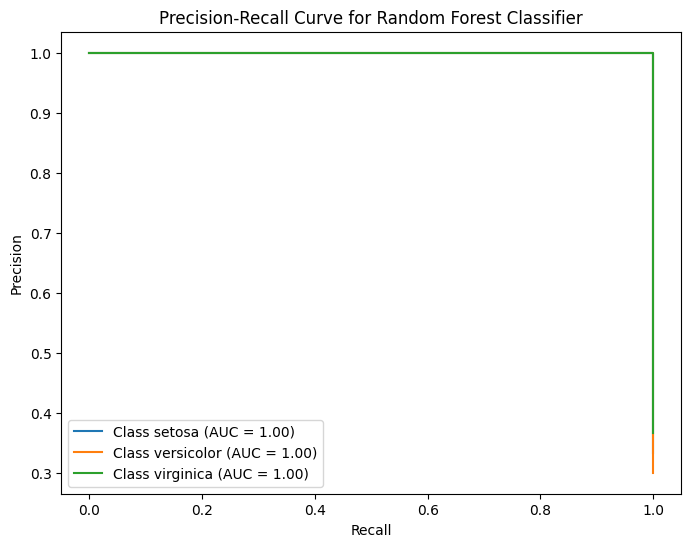

In [4]:
#43Train a Random Forest Classifier and plot the Precision-Recall curv T

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data (not strictly necessary for cross-validation, but useful for general testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.4f}')

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predicted probabilities for Precision-Recall Curve
y_scores = rf_clf.predict_proba(X_test)
precision = dict()
recall = dict()
pr_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(len(data.target_names)):
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_scores[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {data.target_names[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend()
plt.show()


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667


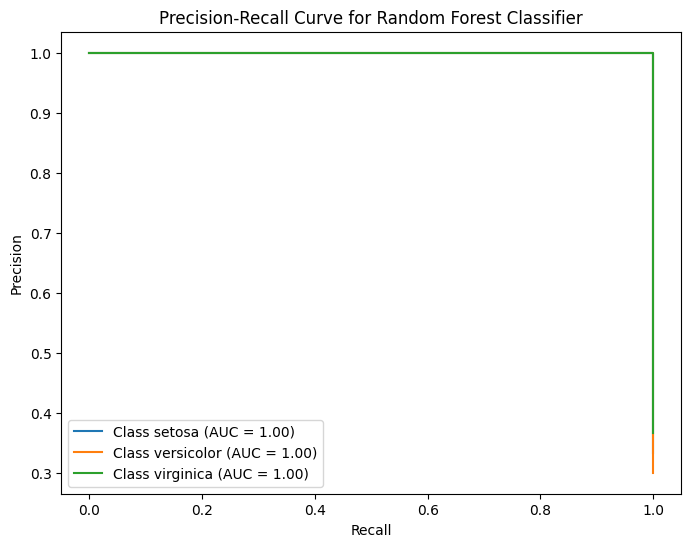

Stacking Classifier Accuracy: 1.0000


In [6]:
#44 Train a Random Forest Classifier and plot the Precision-Recall curv T

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_recall_curve, auc, accuracy_score
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Create a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.4f}')

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predicted probabilities for Precision-Recall Curve
y_scores = rf_clf.predict_proba(X_test)
precision = dict()
recall = dict()
pr_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(len(data.target_names)):
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_scores[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {data.target_names[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend()
plt.show()

# Train a Stacking Classifier with Random Forest and Logistic Regression
estimators = [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
              ('lr', LogisticRegression(max_iter=1000))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=SVC(probability=True))
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Evaluate Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {stacking_accuracy:.4f}')


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9667


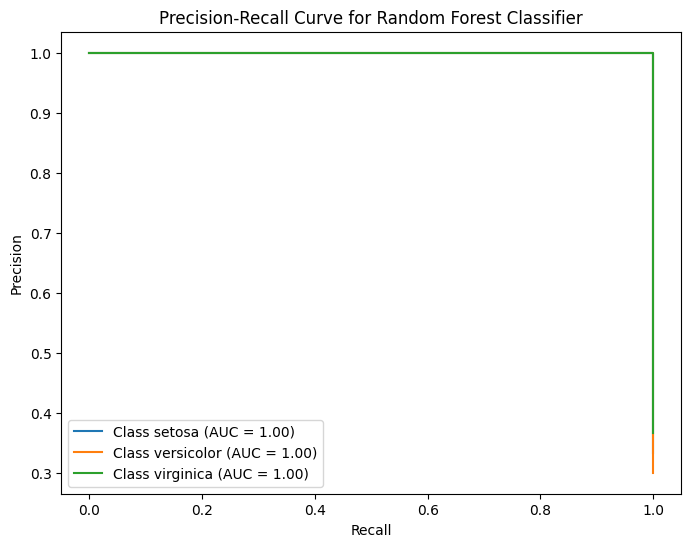

Stacking Classifier Accuracy: 1.0000


NameError: name 'DecisionTreeRegressor' is not defined

In [9]:
#45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, mean_squared_error
from sklearn.datasets import load_iris, load_diabetes
import numpy as np
import matplotlib.pyplot as plt

# Load classification dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Create a Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.4f}')

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get predicted probabilities for Precision-Recall Curve
y_scores = rf_clf.predict_proba(X_test)
precision = dict()
recall = dict()
pr_auc = dict()

plt.figure(figsize=(8, 6))
for i in range(len(data.target_names)):
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_scores[:, i])
    pr_auc[i] = auc(recall[i], precision[i])
    plt.plot(recall[i], precision[i], label=f'Class {data.target_names[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend()
plt.show()

# Train a Stacking Classifier with Random Forest and Logistic Regression
estimators = [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
              ('lr', LogisticRegression(max_iter=1000))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=SVC(probability=True))
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Evaluate Stacking Classifier
stacking_accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {stacking_accuracy:.4f}')

# Load regression dataset
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

# Split the regression data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train a Bagging Regressor with different levels of bootstrap samples
for bootstrap in [True, False]:
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap, random_state=42)
    bagging_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = bagging_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f'Bagging Regressor (bootstrap={bootstrap}) MSE: {mse:.4f}')

